# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [130]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [132]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


5
Numbers of remain columns 5


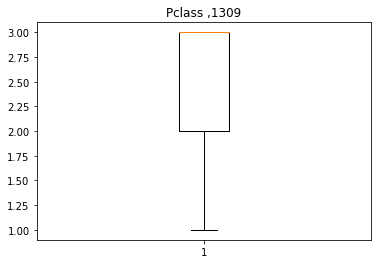

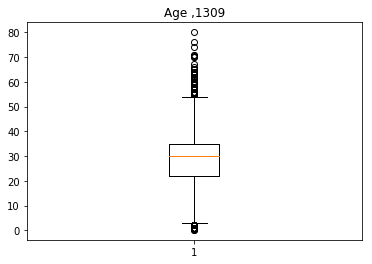

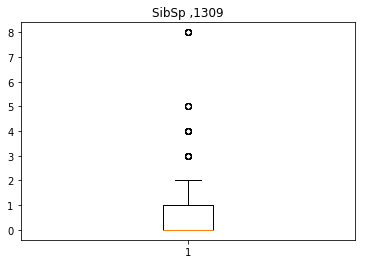

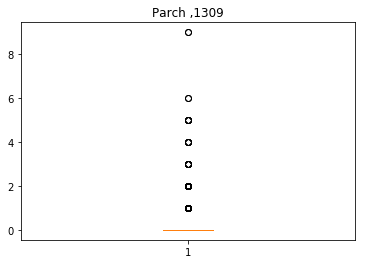

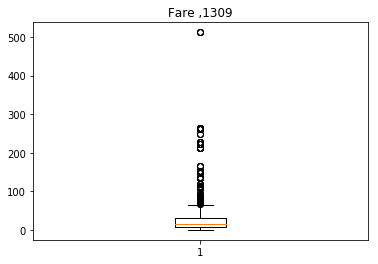

<Figure size 432x288 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt
print(len(num_features))
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns2 = list(df_m1[num_features].columns[list(df_m1[num_features].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %s" % len(numeric_columns2))

df_m1 = df.fillna(df.mean())


# 檢視這些欄位的數值範圍
for col in numeric_columns2:
    """
    Your CODE HERE, make the box plot
    """
    plt.title(col + " ,"+str(len(df_m1[col])))
    plt.boxplot(df_m1[col])
    plt.show()
    plt.clf()

# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

In [134]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

"""
Your Code Here
"""
df_m1 = df.fillna(0)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())



df_m1 = df.fillna(1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 平均數
df_m1 = df.fillna(df.mean())
train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 眾數
from scipy.stats import mode

for c in df.columns:
    df_m1[c] = df[c].fillna(mode(df[c])[0][0])

    
    train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


# 中位數
m = df[df.notnull()].median()
for c,i in zip(df.columns, m):
    df_m1[c] = df[c].fillna(i)

train_X = df_m1[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
#  這個最好

0.6960299128976762
0.6971535084032942
0.6971535084032942
0.6981761033723469
0.6936879984197388
0.6992934218081011


C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [135]:
"""
Your Code Here
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_temp = df_m1.copy()
train_X = df_temp[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

df_temp = MinMaxScaler().fit_transform(df_m1)
train_X = df_temp[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


df_temp = StandardScaler().fit_transform(df_m1)
train_X = df_temp[:train_num]
estimator = LinearRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
# 效果都差不多差


df_temp = np.log(df_m1.astype('float'))
    
train_X = df_temp[:train_num]
estimator = LinearRegression()

print(cross_val_score(estimator, train_X.astype('float'), train_Y.astype('float'), cv=5).mean())



0.1375364385468014
0.13753643854680128
0.1375364385468016


C:\Users\johnma\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
C:\Users\johnma\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').